In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
customer_try = pd.read_excel('p1-customers.xlsx', index_col=0)

In [3]:
customer = pd.read_excel('p1-customers.xlsx', index_col=0)

In [4]:
df = pd.read_excel('p1-customers.xlsx', index_col=0)
df = df[['Customer_Segment', 'Avg_Num_Products_Purchased']]

In [5]:
print(customer.head())
print(customer['Customer_Segment'].value_counts())
print(customer.shape)
print(customer.describe())
print(customer.info())

                    Customer_Segment  Customer_ID            Address  \
Name                                                                   
Pamela Wright     Store Mailing List            2   376 S Jasmine St   
Danell Valdez     Store Mailing List            7   12066 E Lake Cir   
Jessica Rinehart  Store Mailing List            8  7225 S Gaylord St   
Nancy Clark       Store Mailing List            9   4497 Cornish Way   
Andrea Brun       Store Mailing List           10     2316 E 5th Ave   

                               City State    ZIP  Avg_Sale_Amount  \
Name                                                                
Pamela Wright                Denver    CO  80224           227.90   
Danell Valdez     Greenwood Village    CO  80111            55.00   
Jessica Rinehart         Centennial    CO  80122           212.57   
Nancy Clark                  Denver    CO  80239           195.31   
Andrea Brun                  Denver    CO  80206           110.55   

           

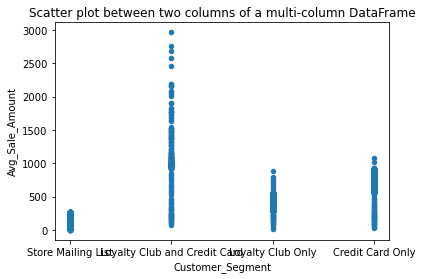

In [6]:

customer.plot.scatter(x='Customer_Segment', y='Avg_Sale_Amount', title= "Scatter plot between two columns of a multi-column DataFrame");

plt.show(block=True);

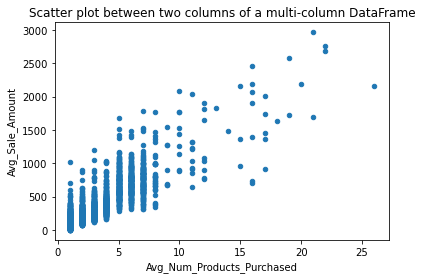

In [7]:
customer.plot.scatter(x='Avg_Num_Products_Purchased', y='Avg_Sale_Amount', title= "Scatter plot between two columns of a multi-column DataFrame");

plt.show(block=True);

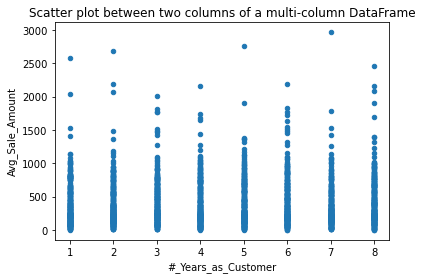

In [8]:
customer.plot.scatter(x='#_Years_as_Customer', y='Avg_Sale_Amount', title= "Scatter plot between two columns of a multi-column DataFrame");

plt.show(block=True);


Text(0.5, 1.0, 'Correlation Heatmap')

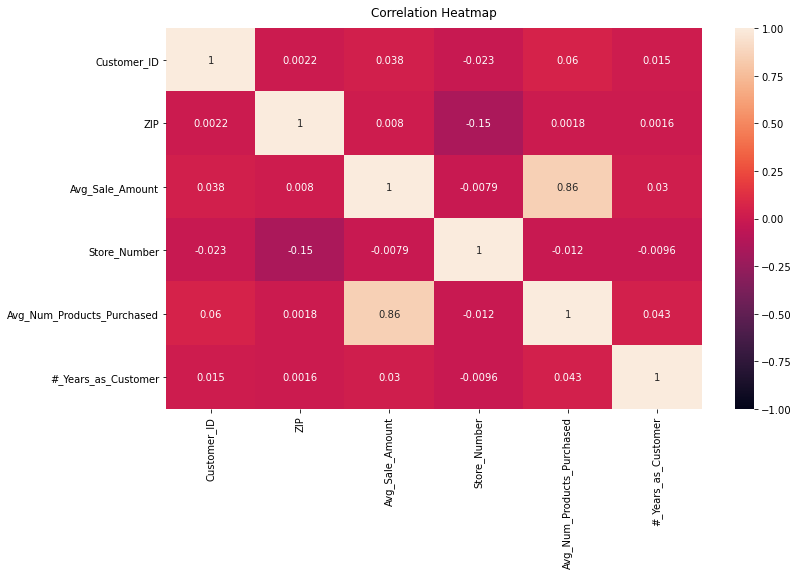

In [9]:
# Correlation matrix to statistically figure out multiple colinearity and variable that doesn't correlate with the target.
plt.figure(figsize=(12, 7))
heatmap = sns.heatmap(customer.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
#plt.savefig('correlation_marix.png')

From the above, only one feature(Avg_Num_Products_Purchased) correlates with the target (Avg_sale_amount). Hence, our problem reduces into a simple linear regression with one independent variable and one dependent variable.

CO    2375
Name: State, dtype: int64

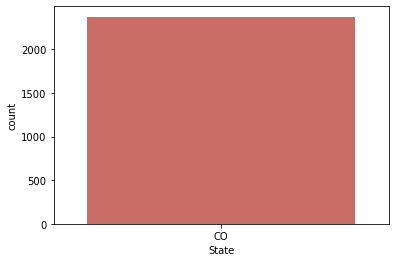

In [10]:
sns.countplot(x='State', data=customer, palette='hls')
customer['State'].value_counts()

In [11]:
# Let us remove the State column(feature) because of low variability (same values across all examples)
customer_try.drop(['State'], axis=1, inplace=True)

In [12]:
customer

Customer_Segment  Customer_ID            Address  \
Name                                                                     
Pamela Wright       Store Mailing List            2   376 S Jasmine St   
Danell Valdez       Store Mailing List            7   12066 E Lake Cir   
Jessica Rinehart    Store Mailing List            8  7225 S Gaylord St   
Nancy Clark         Store Mailing List            9   4497 Cornish Way   
Andrea Brun         Store Mailing List           10     2316 E 5th Ave   
...                                ...          ...                ...   
Joan Delisa           Credit Card Only         3287     1657 S King St   
Helen Cordiner        Credit Card Only         3299  2102 S Lansing Ct   
Angela Finley         Credit Card Only         3303   1068 S Jasper St   
Christine Sullivan    Credit Card Only         3304    7901 W 52nd Ave   
Elissa Engledow       Credit Card Only         3315  9360 E Center Ave   

                                 City State    ZIP  Avg_Sale_Amount  \
Name                                                                  
Pamela Wright                  Denver    CO  80224           227.90   
Danell Valdez       Greenwood Village    CO  80111            55.00   
Jessica Rinehart           Centennial    CO  80122           212.57   
Nancy Clark                    Denver    CO  80239           195.31   
Andrea Brun                    Denver    CO  80206           110.55   
...                               ...   ...    ...              ...   
Joan Delisa                    Denver    CO  80219           818.72   
Helen Cordiner                 Aurora    CO  80014           564.93   
Angela Finley                  Aurora    CO  80017           605.07   
Christine Sullivan             Arvada    CO  80002           656.79   
Elissa Engledow                Denver    CO  80247           167.59   

                    Store_Number Responded_to_Last_Catalog  \
Name                                                         
Pamela Wright                100                        No   
Danell Valdez                105                       Yes   
Jessica Rinehart             101                        No   
Nancy Clark                  105                       Yes   
Andrea Brun                  100                       Yes   
...                          ...                       ...   
Joan Delisa                  101                        No   
Helen Cordiner               105                        No   
Angela Finley                105                        No   
Christine Sullivan           107                        No   
Elissa Engledow              104                        No   

                    Avg_Num_Products_Purchased  #_Years_as_Customer  
Name                                                                 
Pamela Wright                                1                    6  
Danell Valdez                                1                    6  
Jessica Rinehart                             1                    3  
Nancy Clark                                  1                    6  
Andrea Brun                                  1                    2  
...                                        ...                  ...  
Joan Delisa                                  5                    1  
Helen Cordiner                               6                    4  
Angela Finley                                6                    4  
Christine Sullivan                           7                    7  
Elissa Engledow                              1                    3  

[2375 rows x 11 columns]

In [13]:
for col in customer_try.columns:
    if customer_try[col].dtype == 'object':
        customer_try[col] = customer_try[col].astype('category')

        
# converting all the categorical data in our dataframe into numbers. We can't feed in categories to NN, we must convert it first.

cat_columns = customer_try.select_dtypes(['category']).columns
customer_try[cat_columns] = customer_try[cat_columns].apply(lambda x: x.cat.codes)

In [14]:
customer

Customer_Segment  Customer_ID            Address  \
Name                                                                     
Pamela Wright       Store Mailing List            2   376 S Jasmine St   
Danell Valdez       Store Mailing List            7   12066 E Lake Cir   
Jessica Rinehart    Store Mailing List            8  7225 S Gaylord St   
Nancy Clark         Store Mailing List            9   4497 Cornish Way   
Andrea Brun         Store Mailing List           10     2316 E 5th Ave   
...                                ...          ...                ...   
Joan Delisa           Credit Card Only         3287     1657 S King St   
Helen Cordiner        Credit Card Only         3299  2102 S Lansing Ct   
Angela Finley         Credit Card Only         3303   1068 S Jasper St   
Christine Sullivan    Credit Card Only         3304    7901 W 52nd Ave   
Elissa Engledow       Credit Card Only         3315  9360 E Center Ave   

                                 City State    ZIP  Avg_Sale_Amount  \
Name                                                                  
Pamela Wright                  Denver    CO  80224           227.90   
Danell Valdez       Greenwood Village    CO  80111            55.00   
Jessica Rinehart           Centennial    CO  80122           212.57   
Nancy Clark                    Denver    CO  80239           195.31   
Andrea Brun                    Denver    CO  80206           110.55   
...                               ...   ...    ...              ...   
Joan Delisa                    Denver    CO  80219           818.72   
Helen Cordiner                 Aurora    CO  80014           564.93   
Angela Finley                  Aurora    CO  80017           605.07   
Christine Sullivan             Arvada    CO  80002           656.79   
Elissa Engledow                Denver    CO  80247           167.59   

                    Store_Number Responded_to_Last_Catalog  \
Name                                                         
Pamela Wright                100                        No   
Danell Valdez                105                       Yes   
Jessica Rinehart             101                        No   
Nancy Clark                  105                       Yes   
Andrea Brun                  100                       Yes   
...                          ...                       ...   
Joan Delisa                  101                        No   
Helen Cordiner               105                        No   
Angela Finley                105                        No   
Christine Sullivan           107                        No   
Elissa Engledow              104                        No   

                    Avg_Num_Products_Purchased  #_Years_as_Customer  
Name                                                                 
Pamela Wright                                1                    6  
Danell Valdez                                1                    6  
Jessica Rinehart                             1                    3  
Nancy Clark                                  1                    6  
Andrea Brun                                  1                    2  
...                                        ...                  ...  
Joan Delisa                                  5                    1  
Helen Cordiner                               6                    4  
Angela Finley                                6                    4  
Christine Sullivan                           7                    7  
Elissa Engledow                              1                    3  

[2375 rows x 11 columns]

In [15]:
X = customer_try.iloc[:, customer_try.columns != 'Avg_Sale_Amount']
y = customer_try.iloc[:, customer_try.columns == 'Avg_Sale_Amount']
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [16]:
import statsmodels.api as sm
regression_model=sm.OLS(y,X)
result=regression_model.fit()
print(result.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.891     
Dependent Variable:     Avg_Sale_Amount  AIC:                         31243.2030
Date:                   2021-09-04 01:32 BIC:                         31295.1577
No. Observations:       2375             Log-Likelihood:              -15613.   
Df Model:               9                F-statistic:                 2149.     
Df Residuals:           2366             Prob (F-statistic):          0.00      
R-squared (uncentered): 0.891            Scale:                       30133.    
--------------------------------------------------------------------------------
                               Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
--------------------------------------------------------------------------------
Customer_Segment              -26.1413   3.5594 -7.3443 0.0000 -33.1212 -19.1614
Customer_ID                    -0.0059   0.0037 -1.59

In [17]:
# We'll use only the following two features. This is because their p-values are less than 0.05
columns_to_include = ['Customer_Segment', 'Avg_Num_Products_Purchased']

In [18]:
X = customer[columns_to_include]

In [19]:
X.head()

Customer_Segment  Avg_Num_Products_Purchased
Name                                                            
Pamela Wright     Store Mailing List                           1
Danell Valdez     Store Mailing List                           1
Jessica Rinehart  Store Mailing List                           1
Nancy Clark       Store Mailing List                           1
Andrea Brun       Store Mailing List                           1

In [20]:
X = pd.get_dummies(X, drop_first = True)

In [21]:
pd.DataFrame(X).head()

Avg_Num_Products_Purchased  \
Name                                           
Pamela Wright                              1   
Danell Valdez                              1   
Jessica Rinehart                           1   
Nancy Clark                                1   
Andrea Brun                                1   

                  Customer_Segment_Loyalty Club Only  \
Name                                                   
Pamela Wright                                      0   
Danell Valdez                                      0   
Jessica Rinehart                                   0   
Nancy Clark                                        0   
Andrea Brun                                        0   

                  Customer_Segment_Loyalty Club and Credit Card  \
Name                                                              
Pamela Wright                                                 0   
Danell Valdez                                                 0   
Jessica Rinehart                                              0   
Nancy Clark                                                   0   
Andrea Brun                                                   0   

                  Customer_Segment_Store Mailing List  
Name                                                   
Pamela Wright                                       1  
Danell Valdez                                       1  
Jessica Rinehart                                    1  
Nancy Clark                                         1  
Andrea Brun                                         1

In [22]:
X = X.values

In [23]:
y = customer['Avg_Sale_Amount'].values

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression(normalize=False)

In [25]:
regressor.fit(X, y)

LinearRegression()

In [26]:
regressor.coef_

array([  66.97620492, -149.35572194,  281.83876492, -245.4177445 ])

In [27]:
regressor.intercept_.round(5)

303.46347

In [28]:
regressor.score(X,y)

0.8368777093556734

In [29]:
#Construct your regression equation with the coeffients and intercept above with the following table and make sure
# to exclude Customer_Segment_Credit Card Only since we used it as a base case.
pd.get_dummies(df)

Avg_Num_Products_Purchased  \
Name                                             
Pamela Wright                                1   
Danell Valdez                                1   
Jessica Rinehart                             1   
Nancy Clark                                  1   
Andrea Brun                                  1   
...                                        ...   
Joan Delisa                                  5   
Helen Cordiner                               6   
Angela Finley                                6   
Christine Sullivan                           7   
Elissa Engledow                              1   

                    Customer_Segment_Credit Card Only  \
Name                                                    
Pamela Wright                                       0   
Danell Valdez                                       0   
Jessica Rinehart                                    0   
Nancy Clark                                         0   
Andrea Brun                                         0   
...                                               ...   
Joan Delisa                                         1   
Helen Cordiner                                      1   
Angela Finley                                       1   
Christine Sullivan                                  1   
Elissa Engledow                                     1   

                    Customer_Segment_Loyalty Club Only  \
Name                                                     
Pamela Wright                                        0   
Danell Valdez                                        0   
Jessica Rinehart                                     0   
Nancy Clark                                          0   
Andrea Brun                                          0   
...                                                ...   
Joan Delisa                                          0   
Helen Cordiner                                       0   
Angela Finley                                        0   
Christine Sullivan                                   0   
Elissa Engledow                                      0   

                    Customer_Segment_Loyalty Club and Credit Card  \
Name                                                                
Pamela Wright                                                   0   
Danell Valdez                                                   0   
Jessica Rinehart                                                0   
Nancy Clark                                                     0   
Andrea Brun                                                     0   
...                                                           ...   
Joan Delisa                                                     0   
Helen Cordiner                                                  0   
Angela Finley                                                   0   
Christine Sullivan                                              0   
Elissa Engledow                                                 0   

                    Customer_Segment_Store Mailing List  
Name                                                     
Pamela Wright                                         1  
Danell Valdez                                         1  
Jessica Rinehart                                      1  
Nancy Clark                                           1  
Andrea Brun                                           1  
...                                                 ...  
Joan Delisa                                           0  
Helen Cordiner                                        0  
Angela Finley                                         0  
Christine Sullivan                                    0  
Elissa Engledow                                       0  

[2375 rows x 5 columns]

In [30]:
mailing = pd.read_excel('p1-mailinglist.xlsx', index_col=0)

In [31]:
mailing.shape

(250, 17)

In [32]:
1
mailing['Avg_Num_Products_Purchased'] = mailing['Avg_Num_Products_Purchased'].fillna(mailing['Avg_Num_Products_Purchased'].mode()[0])

In [33]:
1
mailing['Average Sale Amount'] = mailing['Average Sale Amount'].fillna(mailing['Average Sale Amount'].mode()[0])

In [34]:
1
mailing['Customer_Segment'] = mailing['Customer_Segment'].fillna(mailing['Customer_Segment'].mode()[0])

In [35]:
mailing.isnull().any()

Customer_Segment                         False
Coefficient_Estimate_Customer_Segment     True
Customer_ID                              False
Address                                  False
City                                     False
State                                    False
ZIP                                      False
Store_Number                             False
Avg_Num_Products_Purchased               False
Avg_num_Coefficient                      False
#_Years_as_Customer                      False
Score_No                                 False
Score_Yes                                False
Unnamed: 14                               True
Average Sale Amount                      False
Expected Revenue                         False
Profit                                   False
dtype: bool

In [36]:
X_mailing = mailing[columns_to_include]
y_mailing = mailing['Average Sale Amount']
print(X_mailing.shape)
print(y_mailing.shape)

(250, 2)
(250,)


In [37]:
X_mailing = pd.get_dummies(X_mailing, drop_first = True)

In [38]:
X_mailing = X_mailing.values
y_mailing = y_mailing.values

In [39]:
y_pred = regressor.predict(X_mailing)

In [40]:
R_squared = r2_score(y_mailing, y_pred)
print(f'Done.\nR-squared: {R_squared.round(4)*100}')

Done.
R-squared: 99.53


We have a perfect adjusted R-Squared as seen above.